# DEEPAK SUPERSTORE SALES PYTHON PROJECT

In [1]:
# IMPORTING PYTHON LIBRARIES

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


In [2]:
# import excel file

df = pd.read_excel("Superstore.xlsx")

In [ ]:
df.shape


In [ ]:
df.head(3)


# DATA CLEANING

In [ ]:
# identify null values 

df.isnull().sum()

In [23]:
# drop null values 
df.dropna(inplace = True)

In [21]:
df.describe()


,A`,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2018-04-30 10:03:51.979187712,2018-05-04 09:03:29.645787392,55245.233297,229.858001,3.789574,0.156203,28.656896
min,1.000000,2016-01-03 00:00:00,2016-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2017-05-23 00:00:00,2017-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2018-06-26 00:00:00,2018-06-29 00:00:00,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2019-05-14 00:00:00,2019-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2019-12-30 00:00:00,2020-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32038.715955,623.245101,2.225110,0.206452,234.260108


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   A`              9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [ ]:
# rename column
df.rename(columns ={'A`':'Row ID.'})

In [27]:
# change datatype 
df['Sales'] = df['Sales'].astype('int')

# EXPLORATOY DATA ANALYSIS

In [32]:
df.shape


(9983, 21)

# SHIP MODE

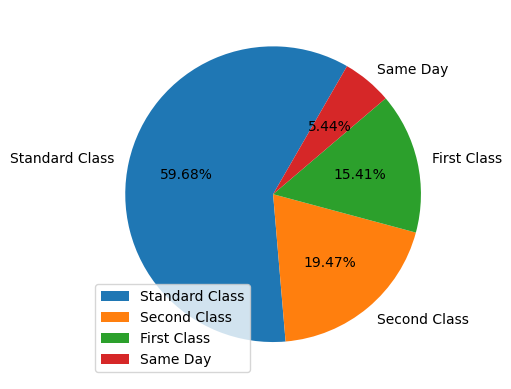

In [73]:
# Visualize Total order by shipmode in piechart
df['Ship Mode'].value_counts()

x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

plt.pie(y,labels = x,startangle=60,autopct= '%0.2f%%')
plt.legend(loc = 3)

plt.show()

Text(0.5, 1.0, 'Count of Shipmode')

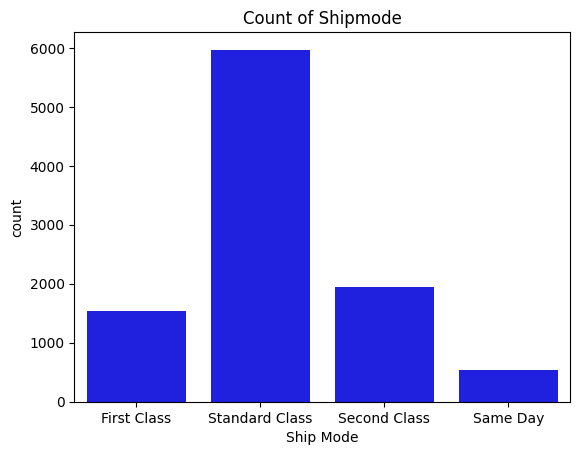

In [33]:
# Visualize total order by shipmode
sns.countplot(x = "Ship Mode",data = df,color="blue")
plt.title("Count of Shipmode")

<Axes: xlabel='Ship Mode', ylabel='count'>

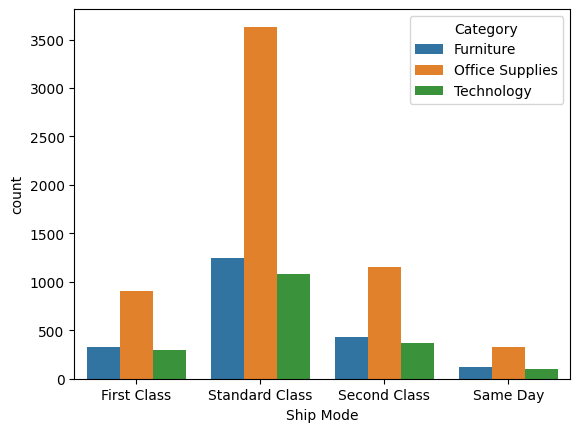

In [86]:
# Visualize total order by shipmode and category
sns.countplot(x = "Ship Mode",data = df,hue = "Category")

In [33]:
df["Segment"].value_counts()

Segment
Consumer       5186
Corporate      3015
Home Office    1782
Name: count, dtype: int64

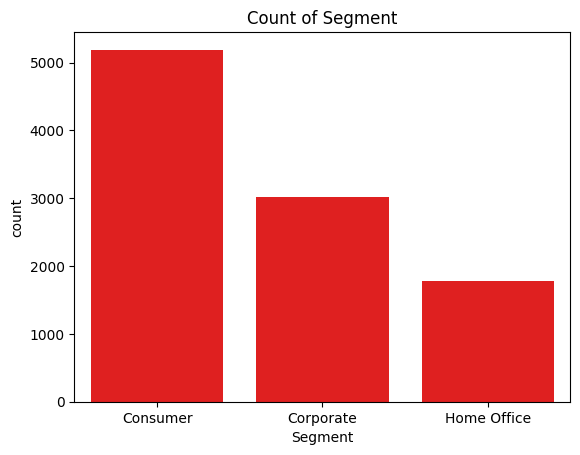

In [13]:
# Visualize total order by segment 
sns.countplot(x = "Segment",data = df,color = "red")
plt.title("Count of Segment")
plt.savefig("Count of Segmen.jpg")
plt.show()

Text(0.5, 1.0, 'Count of Category')

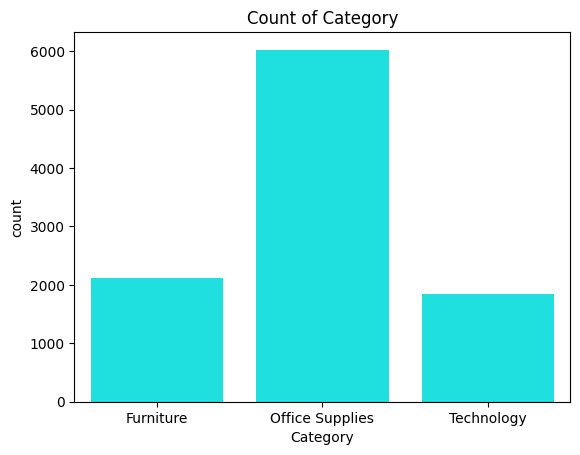

In [32]:
# Visualize total order by category
sns.countplot(x = "Category",data = df,color ="cyan")
plt.title("Count of Category")

<Figure size 1500x1500 with 0 Axes>

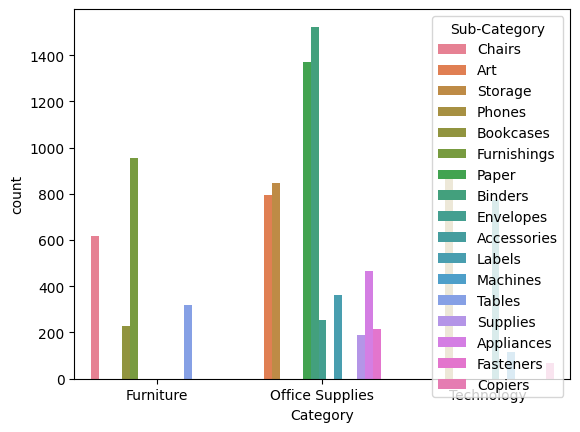

<Figure size 1500x1500 with 0 Axes>

In [4]:
sns.countplot(x = "Category",data = df, hue = "Sub-Category")

<Figure size 500x900 with 0 Axes>

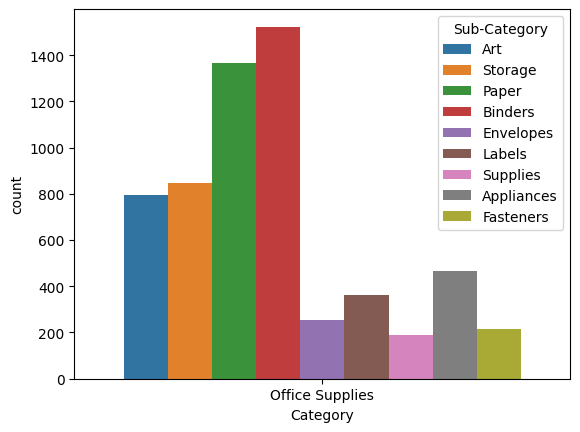

<Figure size 500x900 with 0 Axes>

In [95]:
# Visualize total order by category of office supplies
sns.countplot(x = "Category",data = df[df["Category"]=="Office Supplies"], hue ="Sub-Category")

# TIME SERIES ANALYSIS

In [22]:
df['Order year'] = df['Order Date'].dt.year

In [23]:
df['Order year'].value_counts()

Order year
2019    3312
2018    2587
2017    2102
2016    1993
Name: count, dtype: int64

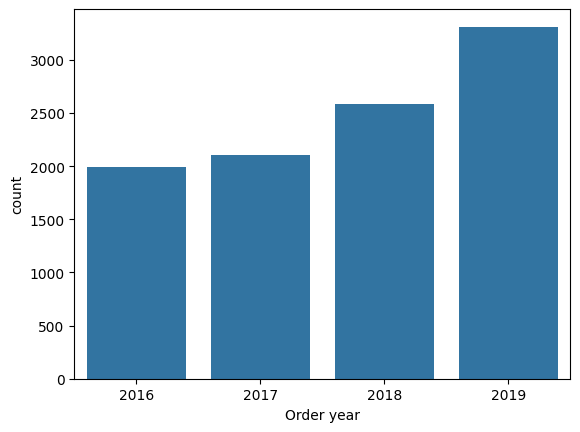

In [24]:
# Visualize total order by years
sns.countplot(x = 'Order year',data = df)
plt.show()

   Year        Sales
0  2016  484247.4981
1  2017  470532.5090
2  2018  609205.5980
3  2019  733215.2552


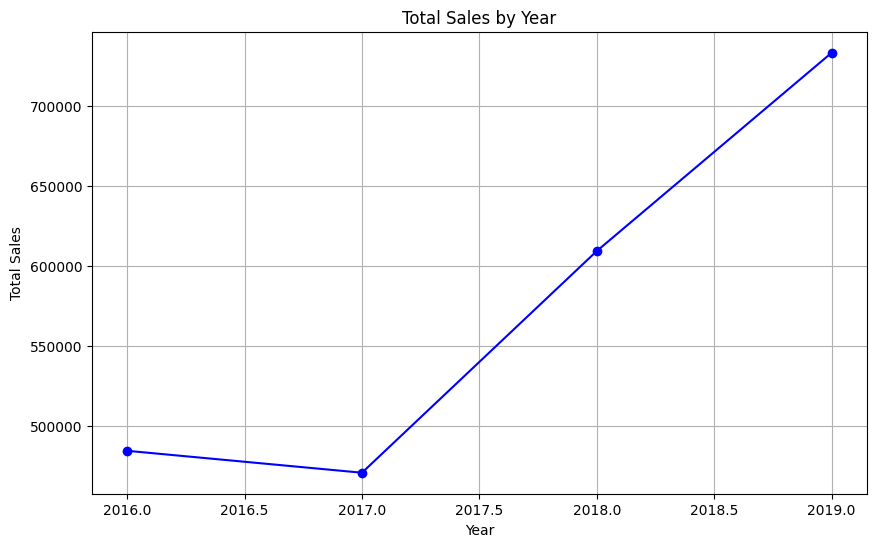

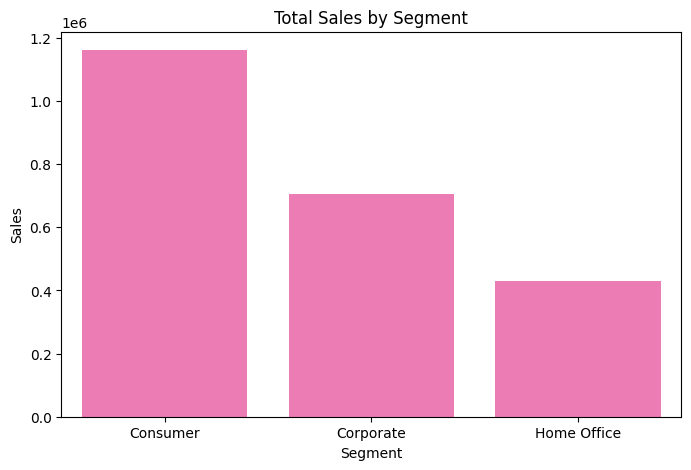

In [25]:
# Visualize Sales by Category
sales_by_category = df.groupby("Segment")['Sales'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="Segment", y='Sales', data=sales_by_category,color = "hotpink")
plt.title('Total Sales by Segment')
plt.show()

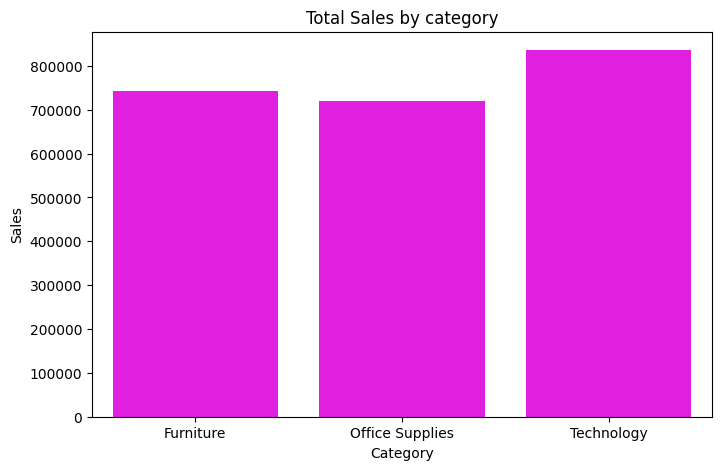

In [29]:
# Visualize Sales by Category
sales_by_category = df.groupby("Category")['Sales'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y='Sales', data=sales_by_category, color ="fuchsia")
plt.title('Total Sales by category')
plt.show()

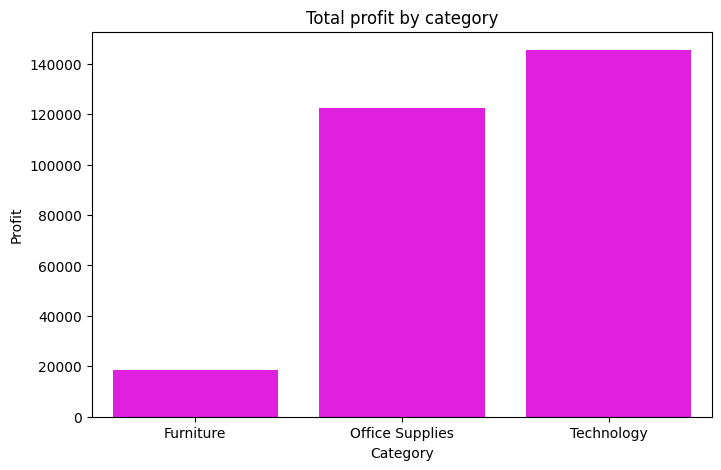

In [31]:
# Visualize Sales by Category
sales_by_category = df.groupby("Category")['Profit'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y='Profit', data=sales_by_category, color ="fuchsia")
plt.title('Total profit by category')
plt.show()

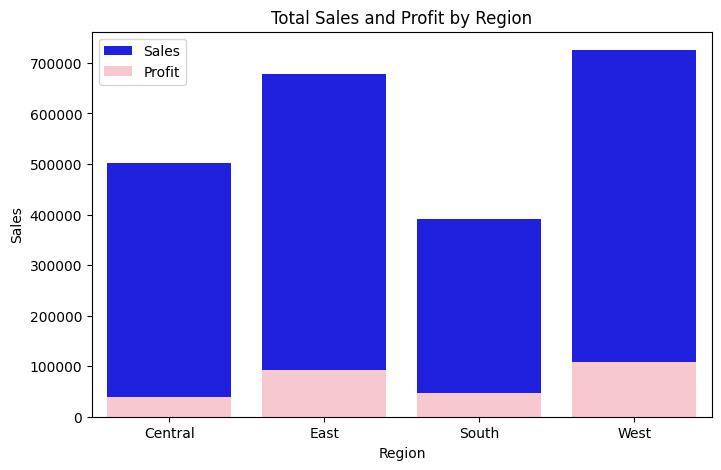

In [54]:
# Plot Sales and Profit by region
sales_profit_by_segment = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Region', y='Sales', data=sales_profit_by_segment, color='blue', label='Sales')
sns.barplot(x='Region', y='Profit', data=sales_profit_by_segment, color='pink', label='Profit')
plt.title('Total Sales and Profit by Region')
plt.legend()
plt.show()


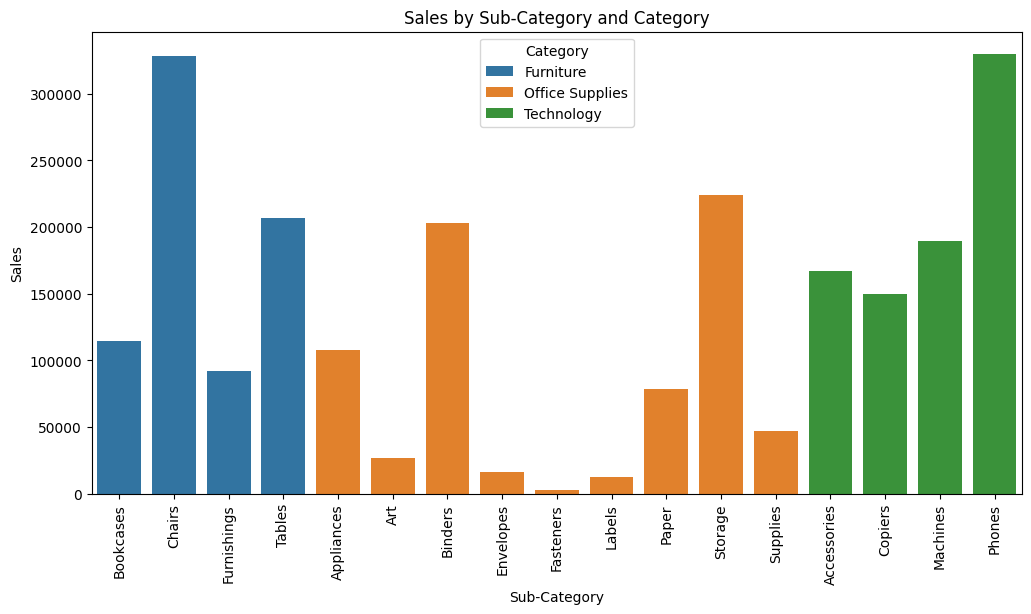

In [41]:
# Plot Sales by Sub-Category and category
sales_profit_by_subcategory = df.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', hue='Category', data=sales_profit_by_subcategory)
plt.xticks(rotation=90)
plt.title('Sales by Sub-Category and Category')
plt.show()

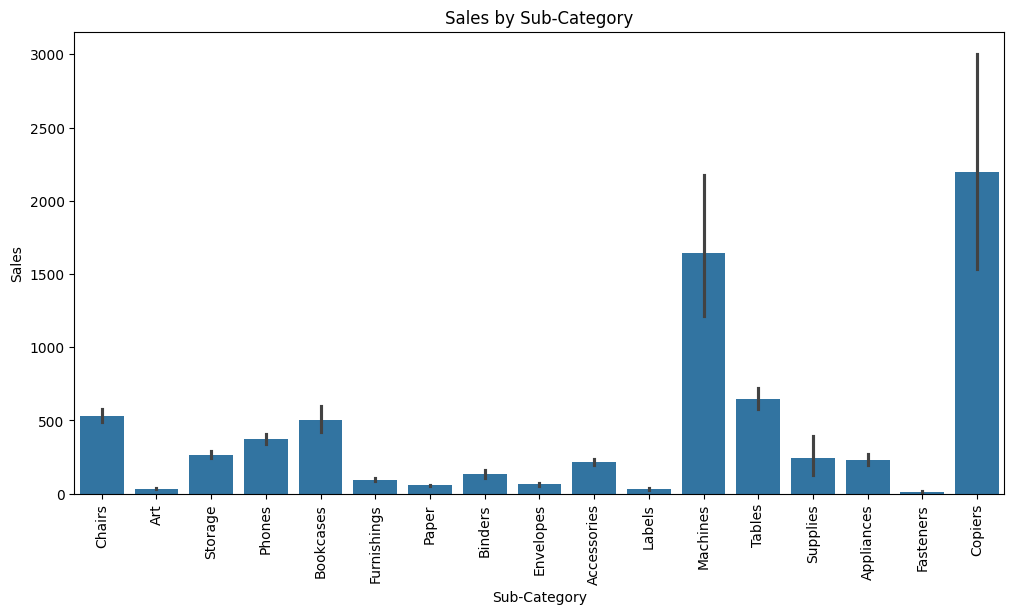

In [28]:
# Visualize Sales by Sub category
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Sales', data=df)
plt.xticks(rotation=90)
plt.title('Sales by Sub-Category')
plt.show()

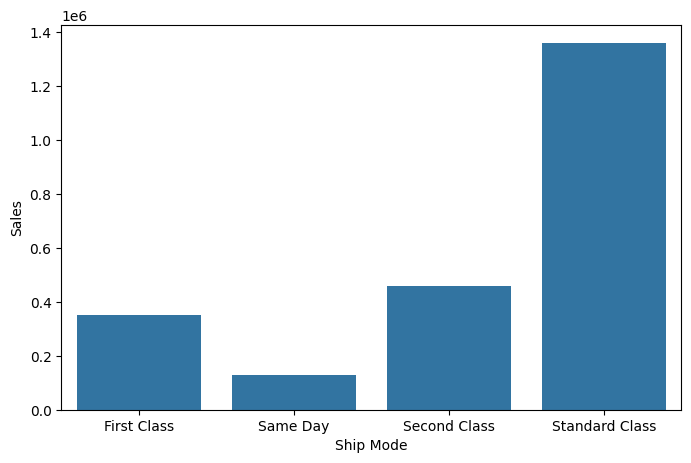

In [3]:
# Group by Ship Mode and calculate total Sales
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Plotting Sales Distribution by Ship Mode
plt.figure(figsize=(8,5))
sns.barplot(x='Ship Mode', y='Sales', data=shipmode_sales)
plt.ylabel('Sales')
plt.show()

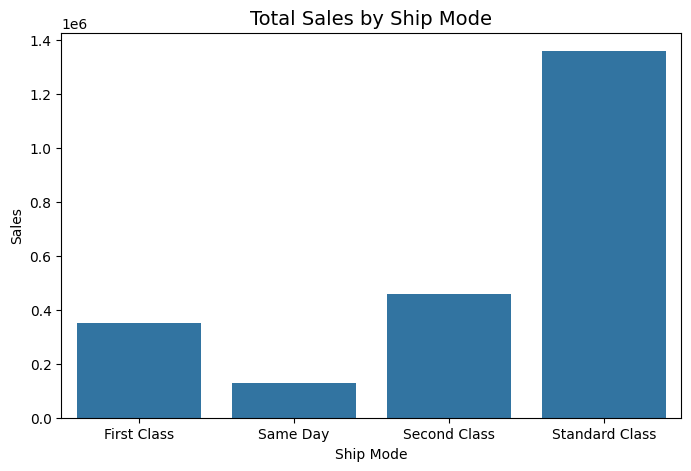

In [5]:
# Group by Ship Mode and calculate total Sales
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Plotting Sales Distribution by Ship Mode with colorful columns
plt.figure(figsize=(8,5))
colors = ['#FFD700', '#00FA9A', '#DC143C', '#4169E1']
sns.barplot(x='Ship Mode', y='Sales', data=shipmode_sales)
plt.title('Total Sales by Ship Mode', fontsize=14)
plt.ylabel('Sales')
plt.show()

# Conclusion

In [ ]:
 Insights and Conclusion
After performing the EDA, here are some observations and insights:

1. Sales and Profit by Category:
Technology has the highest sales as well as profit.
Furniture generates decent sales but has significantly lower profits, indicating a lower profit margin.
Office Supplies also shows good profitability, suggesting efficient sales in this category.

2. Sales by Region:
West and East regions are the most profitable in terms of sales.
Central and South regions have lower sales, which may indicate market expansion opportunities in these areas.

3. Profit by Sub-Category:
Categories like Copiers, machines, and chairs have high sales,
Products like lables and Arts have less sales, indicating that they may be sold at a loss.

4. Sales and Profit by Segment:
Consumer and Corporate segments generate higher sales and profit compared to the Home Office segment.
Strategies could be considered to increase engagement with the Home Office segment.
    
5. Sales Distribution by Ship Mode:
Standard Class is the most common shipping mode used, indicating that customers prefer economical shipping options over faster deliveries.
Same Day shipping generates significantly less sales, possibly due to higher costs associated with it.
    
6. Region-wise Sales Distribution Across Categories:
The Technology category contributes significantly to sales in every region.
The South region has the least sales across all categories, pointing to possible market opportunities for growth in this region.